# The Sparks Foundation-Data Science and Business Analytics-January2022
## Task 2: Prediction using Unsupervised ML
## Dataset link : https://bit.ly/3kXTdox
# Author : Salma Tekaya



In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

## Loading and exploring the iris dataset

In [7]:

data = pd.read_csv('Iris.csv')
print("Data imported successfully")
data.head(10)

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Visualization of Data

In [9]:
data.shape

(150, 6)

In [10]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

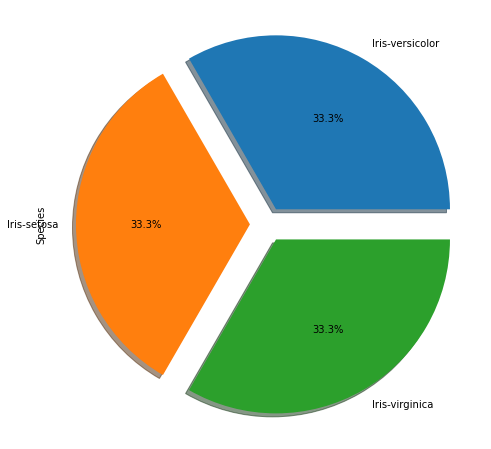

In [13]:
data['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct="%1.1f%%",shadow=True,figsize=(10,8))
plt.show()

In [14]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

## Finding the optimum number of clusters in dataset

### using k-means as a clustering algorithm

In [16]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
#Creating an array of within cluster sum of square
within_cluster_sum_of_square=[]
#selecting all the rows and columns number 1,2,3,4
x = data.iloc[:,[0,1,2,3]].values 
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter = 300,n_init = 10,random_state = 0)
    kmeans.fit(x)
    within_cluster_sum_of_square.append(kmeans.inertia_)

### Using the elbow method to determine the optimum number of clusters for k-means clustering 

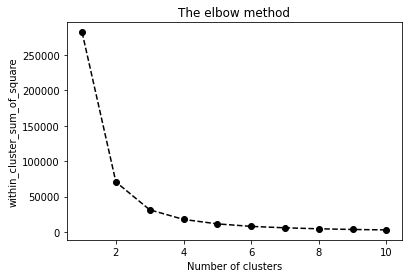

In [18]:
plt.plot(range(1,11),wcss,'go--',color='black')
plt.title("The elbow method")
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_square')
plt.show()

## Applying Kmeans to the dataset

In [19]:
model = KMeans(n_clusters=3,init='k-means++',max_iter = 300,n_init = 10,random_state = 0)
prediction = model.fit_predict(x)

### Visualising the clusters 

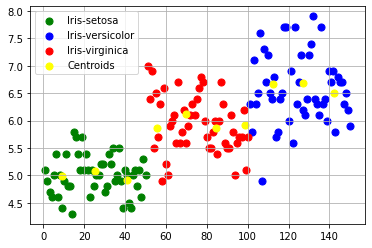

In [22]:
plt.scatter(x[prediction == 0,0],x[prediction == 0,1],
           s = 50,c='green',label='Iris-setosa')
plt.scatter(x[prediction == 1,0],x[prediction == 1,1],
           s = 50,c='blue',label='Iris-versicolor')
plt.scatter(x[prediction == 2,0],x[prediction == 2,1],
           s = 50,c='red',label='Iris-virginica ')
#plotting the cluster centers to get the centroid of clustering
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s = 50,c='yellow',label='Centroids')
plt.legend()
plt.grid()
plt.show()


## Conclusion : we can see three clusters from the given dataset and visualize it
# Thank you!
